**Feature Engineering Notebook Two: Feature Selection and dimensionality reduction**  
*Author: Yingxiang Chen*

**Reference**
- https://scikit-learn.org/stable/modules/feature_selection.html
- https://machinelearningmastery.com/an-introduction-to-feature-selection/
- https://dcor.readthedocs.io/en/latest/functions/dcor.independence.distance_covariance_test.html
- https://en.wikipedia.org/wiki/Distance_correlation
- https://stats.stackexchange.com/questions/56881/whats-the-relationship-between-r2-and-f-test
- https://en.wikipedia.org/wiki/Mutual_information
- https://libguides.library.kent.edu/SPSS/ChiSquare
- https://chrisalbon.com/machine_learning/feature_selection/anova_f-value_for_feature_selection/
- https://online.stat.psu.edu/stat414/node/218/
- http://featureselection.asu.edu/algorithms.php
- https://en.wikipedia.org/wiki/Minimum_redundancy_feature_selection
- Peng, H., Long, F., & Ding, C. (2005). Feature selection based on mutual information: criteria of max-dependency, max-relevance, and min-redundancy. IEEE Transactions on Pattern Analysis & Machine Intelligence, (8), 1226-1238.
- Hall, M. A., & Smith, L. A. (1999, May). Feature selection for machine learning: comparing a correlation-based filter approach to the wrapper. In FLAIRS conference (Vol. 1999, pp. 235-239).
- Yu, L., & Liu, H. (2003). Feature selection for high-dimensional data: A fast correlation-based filter solution. In Proceedings of the 20th international conference on machine learning (ICML-03) (pp. 856-863).
- Zhao, Z., & Liu, H. (2007, June). Spectral feature selection for supervised and unsupervised learning. In Proceedings of the 24th international conference on Machine learning (pp. 1151-1157). ACM.
- Robnik-Šikonja, M., & Kononenko, I. (2003). Theoretical and empirical analysis of ReliefF and RReliefF. Machine learning, 53(1-2), 23-69.
- https://machinelearningmastery.com/an-introduction-to-feature-selection/
- http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Filter-Methods" data-toc-modified-id="Filter-Methods-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Filter Methods</a></span><ul class="toc-item"><li><span><a href="#Univariate-Filter-Methods" data-toc-modified-id="Univariate-Filter-Methods-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Univariate Filter Methods</a></span><ul class="toc-item"><li><span><a href="#Variance-Threshold" data-toc-modified-id="Variance-Threshold-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Variance Threshold</a></span></li><li><span><a href="#Pearson-Correlation-(regression-problem)" data-toc-modified-id="Pearson-Correlation-(regression-problem)-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Pearson Correlation (regression problem)</a></span></li><li><span><a href="#Distance-Correlation-(regression-problem)" data-toc-modified-id="Distance-Correlation-(regression-problem)-1.1.1.3"><span class="toc-item-num">1.1.1.3&nbsp;&nbsp;</span>Distance Correlation (regression problem)</a></span></li><li><span><a href="#F-Score-(regression-problem)" data-toc-modified-id="F-Score-(regression-problem)-1.1.1.4"><span class="toc-item-num">1.1.1.4&nbsp;&nbsp;</span>F-Score (regression problem)</a></span></li><li><span><a href="#Mutual-Information-(regression-problem)" data-toc-modified-id="Mutual-Information-(regression-problem)-1.1.1.5"><span class="toc-item-num">1.1.1.5&nbsp;&nbsp;</span>Mutual Information (regression problem)</a></span></li><li><span><a href="#Chi-squared-Statistics-(classification-problem)" data-toc-modified-id="Chi-squared-Statistics-(classification-problem)-1.1.1.6"><span class="toc-item-num">1.1.1.6&nbsp;&nbsp;</span>Chi-squared Statistics (classification problem)</a></span></li><li><span><a href="#F-Score-(classification-problem)" data-toc-modified-id="F-Score-(classification-problem)-1.1.1.7"><span class="toc-item-num">1.1.1.7&nbsp;&nbsp;</span>F-Score (classification problem)</a></span></li><li><span><a href="#Mutual-Information-(classification-problem)" data-toc-modified-id="Mutual-Information-(classification-problem)-1.1.1.8"><span class="toc-item-num">1.1.1.8&nbsp;&nbsp;</span>Mutual Information (classification problem)</a></span></li></ul></li><li><span><a href="#Multivariate-Filter-Methods" data-toc-modified-id="Multivariate-Filter-Methods-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Multivariate Filter Methods</a></span><ul class="toc-item"><li><span><a href="#Max-Relevance-Min-Redundancy-(mRMR)" data-toc-modified-id="Max-Relevance-Min-Redundancy-(mRMR)-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>Max-Relevance Min-Redundancy (mRMR)</a></span></li><li><span><a href="#Correlation-based-Feature-Selection-(CFS)" data-toc-modified-id="Correlation-based-Feature-Selection-(CFS)-1.1.2.2"><span class="toc-item-num">1.1.2.2&nbsp;&nbsp;</span>Correlation-based Feature Selection (CFS)</a></span></li><li><span><a href="#Fast-Correlation-based-Filter-(FCBF)" data-toc-modified-id="Fast-Correlation-based-Filter-(FCBF)-1.1.2.3"><span class="toc-item-num">1.1.2.3&nbsp;&nbsp;</span>Fast Correlation-based Filter (FCBF)</a></span></li><li><span><a href="#ReliefF" data-toc-modified-id="ReliefF-1.1.2.4"><span class="toc-item-num">1.1.2.4&nbsp;&nbsp;</span>ReliefF</a></span></li><li><span><a href="#Spectral-Feature-Selection-(SPEC)" data-toc-modified-id="Spectral-Feature-Selection-(SPEC)-1.1.2.5"><span class="toc-item-num">1.1.2.5&nbsp;&nbsp;</span>Spectral Feature Selection (SPEC)</a></span></li></ul></li></ul></li><li><span><a href="#Wrapper-Methods" data-toc-modified-id="Wrapper-Methods-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Wrapper Methods</a></span><ul class="toc-item"><li><span><a href="#Deterministic-Algorithm" data-toc-modified-id="Deterministic-Algorithm-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Deterministic Algorithm</a></span><ul class="toc-item"><li><span><a href="#Recursive-Feature-Elimination-(SBS)" data-toc-modified-id="Recursive-Feature-Elimination-(SBS)-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Recursive Feature Elimination (SBS)</a></span></li></ul></li><li><span><a href="#Randomized-Algorithms" data-toc-modified-id="Randomized-Algorithms-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Randomized Algorithms</a></span><ul class="toc-item"><li><span><a href="#Simulated-Annealing-(SA)" data-toc-modified-id="Simulated-Annealing-(SA)-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Simulated Annealing (SA)</a></span></li><li><span><a href="#Genetic-Algorithm-(GA)" data-toc-modified-id="Genetic-Algorithm-(GA)-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>Genetic Algorithm (GA)</a></span></li></ul></li></ul></li><li><span><a href="#Embedded-Methods" data-toc-modified-id="Embedded-Methods-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Embedded Methods</a></span><ul class="toc-item"><li><span><a href="#Regulization-Based-Methods" data-toc-modified-id="Regulization-Based-Methods-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Regulization Based Methods</a></span><ul class="toc-item"><li><span><a href="#Lasso-Regression-(Linear-Regression-with-L1-Norm)" data-toc-modified-id="Lasso-Regression-(Linear-Regression-with-L1-Norm)-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Lasso Regression (Linear Regression with L1 Norm)</a></span></li><li><span><a href="#Logistic-Regression-(with-L1-Norm)" data-toc-modified-id="Logistic-Regression-(with-L1-Norm)-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Logistic Regression (with L1 Norm)</a></span></li><li><span><a href="#LinearSVR/-LinearSVC" data-toc-modified-id="LinearSVR/-LinearSVC-1.3.1.3"><span class="toc-item-num">1.3.1.3&nbsp;&nbsp;</span>LinearSVR/ LinearSVC</a></span></li></ul></li><li><span><a href="#Tree-Based-Methods" data-toc-modified-id="Tree-Based-Methods-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Tree Based Methods</a></span></li></ul></li></ul></li></ul></div>

# Feature Selection

After data prepocessing, we have generated a large number of features. But in fact, some of these features might be redundant since they do not improve model performance much but they consume much memory & computing power when building the models. So we should perform feature selection and select a subset of features for modeling. 

## Filter Methods

Filter methods use statistical measures to assign scores to each features. Features with higher scores tend be more importan and should be included in the subsets.

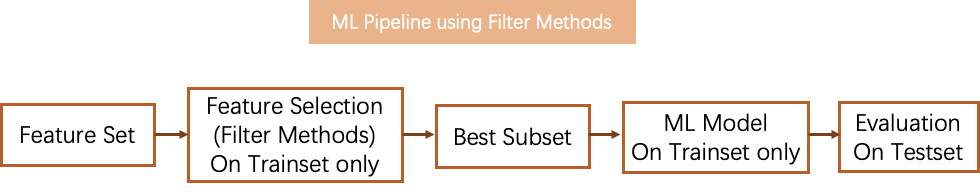

### Univariate Filter Methods

Univariate filter methods selecting the best feature based on univariate statistical tests. 
It consider the feature independently or with regrad to the target variable only.

#### Variance Threshold

Variance approcash simply remove all the features that have variance below some threshold. FOr example, a feature with zero variance (features that have the same value in all samples) should be removed because this feature can not example any variance in the target variance.

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# create some synthesized dataset
train_set = np.array([[1,2,3],[1,4,7],[1,4,9]]) # the first feature have zero variance
# array([[1, 2, 3],
#        [1, 4, 7],
#        [1, 4, 9]])

test_set = np.array([[3,2,3],[1,2,7]])
# array([[3, 2, 3],
#        [1, 2, 7]])

selector = VarianceThreshold()
selector.fit(train_set)
transformed_train = selector.transform(train_set)
# the first feature has been removed
# array([[2, 3],
#        [4, 7],
#        [4, 9]])

transformed_test = selector.transform(test_set)
# array([[2, 3],
#        [2, 7]])
# althought in the test set the second features has zero variance
# but according to train set, we should remove the first feature
# or pipeline will crash

#### Pearson Correlation (regression problem)

Pearson Correlation measures the linear correlection between two **continuous** features.  
Formula:  
  
$r = \frac{\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})}{\sqrt{(X_i-\bar{X})^2}\sqrt{(Y_i-\bar{Y})^2}}$

In [34]:
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 samples as train_set
# the rest samples as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# there is no pre-built Pearson function in sklearn
# we need to use scipy.stats.pearsonr (can only compute the pearsonr between two features) 
# to create a multivariate version of Pearson function that can be used in SelectKBest

def udf_pearsonr(X, y):
    result = np.array([pearsonr(x, y) for x in X.T]) # list of (pearsonr, p-value)
    return np.absolute(result[:,0]), result[:,1]

selector = SelectKBest(udf_pearsonr, k=2) # k => number of top features to select
selector.fit(train_set, train_y)
transformed_train = selector.transform(train_set)
transformed_train.shape #(15000, 2), select the 1st and 7th features
np.array_equal(transformed_train, train_set[:,[0,6]]) # return True

transformed_test = selector.transform(test_set)
np.array_equal(transformed_test, test_set[:,[0,6]]);
# return True, the 1st and 7th features are selected

In [37]:
# validate the result
for idx in range(train_set.shape[1]):
    pea_score, p_value = pearsonr(train_set[:,idx], train_y)
    print(f"The correlation between the {idx + 1} feature and target is {pea_score},p-value is {p_value}")
# so we should select the 1st and 7th features

The correlation between the 1 feature and target is 0.696260060912457,p-value is 0.0
The correlation between the 2 feature and target is 0.06911423212350477,p-value is 2.367844651414239e-17
The correlation between the 3 feature and target is 0.14387825270209337,p-value is 3.3778497818949697e-70
The correlation between the 4 feature and target is -0.03990865151220299,p-value is 1.0117871840573313e-06
The correlation between the 5 feature and target is -0.02087130946582252,p-value is 0.01058014999021562
The correlation between the 6 feature and target is -0.04889008038008132,p-value is 2.0872022590890112e-09
The correlation between the 7 feature and target is -0.23115399149761928,p-value is 4.087076720576962e-181
The correlation between the 8 feature and target is 0.08059738337353183,p-value is 4.769331031759877e-23


#### Distance Correlation (regression problem)

Distance correaltion measures the dependence between two **continuous** features. Unlike pearson correlation, distance correaltion measures both linear and nonlinear association between two variables. 

Formula:  
  
Firstly, compute the (n x n) distance matrices dX with $dX_{ij}$ as elements and dY with $dY_{ij}$ as elementns containing all pairwise distances. $dX_{ij}$ is the distance between sample i and sample j:    
  
$dX_{ij} = \left \| X_i - Y_j \right \|$  
$dY_{ij} = \left \| X_i - Y_j \right \|$
  
Secondly, we calculate the doubly centered distances as below and update the distance matrices. $\bar{X_i}$ the i-th row mean of distance matrices dX, $\bar{X_j}$ the i-th column mean of distance matrices dX, $\sum_i^N \sum_j^N dX_{ij}$ is the grand mean.
  
$dX_{ij} = dX_{ij} - \bar{X_i} - \bar{X_j} + \frac{1}{N^2} \sum_i^N \sum_j^N dX_{ij}$  
$dY_{ij} = dY_{ij} - \bar{Y_i} - \bar{Y_j} + \frac{1}{N^2} \sum_i^N \sum_j^N dY_{ij}$   
  
Then, we compute the sample distance covariance/ variance as below:  
  
$dCov^2 (X, Y) = \frac{1}{N^2} \sum_{i}^{N} \sum_{j}^{N} dX_{ij}dY_{ij}$  
$dVar^2(X) = Cov^2_D (X, X)$  

Finally, the distance correlation $dCor(X,Y)$ is as below:  
  
$dCor(X,Y) = \frac{dCov_D(X, Y)}{\sqrt{dVar^2(X)}\sqrt{dVar^2(Y)} }$

In [38]:
from dcor import distance_correlation
from dcor.independence import distance_covariance_test
from sklearn.feature_selection import SelectKBest

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 samples as train_set
# the rest samples as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# there is no pre-built Pearson function in sklearn
# we need to use scipy.stats.pearsonr (can only compute the pearsonr between two features) 
# to create a multivariate version of Pearson function that can be used in SelectKBest

def udf_dcorr(X, y):
    result = np.array([[distance_correlation(x, y), 
                        distance_covariance_test(x,y)[0]]for x in X.T]) # list of (pearsonr, p-value)
    return result[:,0], result[:,1]

selector = SelectKBest(udf_dcorr, k=2) # k => number of top features to select
selector.fit(train_set, train_y)
transformed_train = selector.transform(train_set)
transformed_train.shape #(15000, 2), select the 1st and 3rd features
np.array_equal(transformed_train, train_set[:,[0,2]]) # return True

transformed_test = selector.transform(test_set)
np.array_equal(transformed_test, test_set[:,[0,2]]);
# return True, the 1st and 3rd features are selected

In [41]:
# validate the result
for idx in range(train_set.shape[1]):
    d_score = distance_correlation(train_set[:,idx], train_y)
    p_value = distance_covariance_test(train_set[:,idx], train_y)[0]
    print(f"The d-correlation between the {idx + 1} feature and target is {d_score}, p-value is {p_value}")
# so we should select the 1st and 3rd features

The d-correlation between the 1 feature and target is 0.6596110295738566, p-value is 1.0
The d-correlation between the 2 feature and target is 0.07201022746866247, p-value is 1.0
The d-correlation between the 3 feature and target is 0.31324704889052385, p-value is 1.0
The d-correlation between the 4 feature and target is 0.1246349044871341, p-value is 1.0
The d-correlation between the 5 feature and target is 0.07594502476507325, p-value is 1.0
The d-correlation between the 6 feature and target is 0.28774336142230394, p-value is 1.0
The d-correlation between the 7 feature and target is 0.24783337889103663, p-value is 1.0
The d-correlation between the 8 feature and target is 0.1887782366590321, p-value is 1.0


#### F-Score (regression problem)

The F-Score (F-Score) reports whether any of the independent variables (in our case, only one non-constant feature) in a linear regression model are significant. Specifically, suppose we have p features, we construct p linear model for each sperately, each regress targer variable with the i-th feature and a constant only. Then we can report the F-Score 
of each inear model which captures the linear relationship between the ith feature and the target variable. The null hypothesis is that the feature is not related with target variable. So we should select features that have higer F-Score (more likely to reject null hypothesis).

Formula:  

$F = \frac{(SST - SSR)/(p - 1)}{SSR/(n - p)} =  \frac{SST - SSR}{SSR/(n - 2)} =  \frac{R^2}{(1 - R^2)(n - 2)} = \frac{\rho ^2}{(1 - \rho ^2)(n - 2)}$  
  
SST is the total sum of squares, SSR is the residual sum of squares, p is the number of predictors (including the constant, so p = 2 in our case) and n is the number of observations. Since in the linear model, there is only one non-constant variable, so $\rho^2 = R^2$.

In [45]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 samples as train_set
# the rest samples as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# use pre-built f-score function in sklearn

selector = SelectKBest(f_regression, k=2) # k => number of top features to select
selector.fit(train_set, train_y)
transformed_train = selector.transform(train_set)
transformed_train.shape #(15000, 2), select the 1st and 7th features
np.array_equal(transformed_train, train_set[:,[0,6]]) # return True

transformed_test = selector.transform(test_set)
np.array_equal(transformed_test, test_set[:,[0,6]]);
# return True, the 1st and 7th features are selected

In [46]:
# validate the result
for idx in range(train_set.shape[1]):
    score, p_value = f_regression(train_set[:,idx].reshape(-1,1), train_y)
    print(f"The F-Score between the {idx + 1} feature and target is {score[0]}, p-value is {p_value[0]}")
# so we should select the 1st and 7th features

The F-Score between the 1 feature and target is 14111.785894592298, p-value is 0.0
The F-Score between the 2 feature and target is 71.98596357720376, p-value is 2.367844651414239e-17
The F-Score between the 3 feature and target is 317.03581517143255, p-value is 3.3778497818979456e-70
The F-Score between the 4 feature and target is 23.925427621616663, p-value is 1.0117871840573313e-06
The F-Score between the 5 feature and target is 6.536149381375066, p-value is 0.01058014999021562
The F-Score between the 6 feature and target is 35.93471149699893, p-value is 2.0872022590890112e-09
The F-Score between the 7 feature and target is 846.6119650087819, p-value is 4.0870767169889586e-181
The F-Score between the 8 feature and target is 98.06309301538357, p-value is 4.769331033410568e-23


#### Mutual Information (regression problem)

Mutual information measures the dependency between the two variables. MI is equal to zero if and only if two random variables are independent, and higher values reflect higher dependency. Compared with Pearson correlation & F-Score, it also captures non-linear relationship.  

Formula:  
  
- For discrete distributions (for both x and y):  
  
    $I(x, y) = \sum_{x\in \mathit{X}}  \sum_{x\in \mathit{Y}} \textit{p}_{(X,Y)}(x,y) \textrm{log}(\frac{\textit{p}_{(X,Y)}(x,y)}{\textit{p}_{X}(x)\textit{p}_{Y}(y)})$  

    Where $\textit{p}_{(X,Y)}(x,y)$ is the joint probability mass function (PMF) of x and y, $\textit{p}_{X}(x)$ is the PMF of x.  
  
- For continuous distributions (for both x and y):  

    $I(X, Y) = \int_X \int_Y  \textit{p}_{(X,Y)}(x,y) \textrm{log}(\frac{\textit{p}_{(X,Y)}(x,y)}{\textit{p}_{X}(x)\textit{p}_{Y}(y)}) \, \, dx dy$  
    
    Where $\textit{p}_{(X,Y)}(x,y)$ is the joint probability density function (PDF) of x and y, $\textit{p}_{X}(x)$ is the PDF of x.  
  
  
But in reality, is it likely that one of x and y is discrete variable and the another is continuous variable. So in sklearn, it implement the nonparametric methods based on entropy estimation from k-nearest neighbors distances proposed in [1] and [2].  
  
  
[1] A. Kraskov, H. Stogbauer and P. Grassberger, “Estimating mutual information”. Phys. Rev. E 69, 2004.  
[2] B. C. Ross “Mutual Information between Discrete and Continuous Data Sets”. PLoS ONE 9(2), 2014. 

In [58]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 samples as train_set
# the rest samples as test_set
train_set = X[0:15000,:].astype(float)
test_set = X[15000:,].astype(float)
train_y = y[0:15000].astype(float)

# since n_neighbors in the KNN is also a very important parameters
# so we write a new MI function function based on pre-built MI function in sklearn
# to allow more flexibility

def udf_MI(X, y):
    result = mutual_info_regression(X, y, n_neighbors = 5) # user_defined n_neighbors
    return result

selector = SelectKBest(udf_MI, k=2) # k => number of top features to select
selector.fit(train_set, train_y)
transformed_train = selector.transform(train_set)
transformed_train.shape #(15000, 2), select the 1st and 8th features
np.array_equal(transformed_train, train_set[:,[0,7]]) # return True

transformed_test = selector.transform(test_set)
np.array_equal(transformed_test, test_set[:,[0,7]]);
# return True, the 1st and 8th features are selected

In [64]:
# validate the result
for idx in range(train_set.shape[1]):
    score = mutual_info_regression(train_set[:,idx].reshape(-1,1), train_y, n_neighbors = 5)
    print(f"The MI between the {idx + 1} feature and target is {score[0]}")
# so we should select the 1st and 8th features

The MI between the 1 feature and target is 0.37476342332541446
The MI between the 2 feature and target is 0.024163314042841222
The MI between the 3 feature and target is 0.10153142055177344
The MI between the 4 feature and target is 0.03046684628477081
The MI between the 5 feature and target is 0.017404828513600812
The MI between the 6 feature and target is 0.08760386864338265
The MI between the 7 feature and target is 0.3672734544966847
The MI between the 8 feature and target is 0.4651095654370314


#### Chi-squared Statistics (classification problem)

Chi-Square Statistic determine whether there is a relationship between **categorical** variables. In the sklearn implementation of Chi-squared function, the features have to be booleans or frequencies. The null hypothesis is that two variables are indepentdent, so the higher chi-squared, the higher probability that the two variables are correlated. So we should select features that have higher chi-squared scores.

Formula:  
  
$\chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(O_{i,j} - E_{i,j})}{E_{i,j}^2} = n \sum_{i,j} p_ip_j(\frac{\frac{O_{i,j}}{n} - p_i p_j}{p_i p_j})$  
  
$O_{i,j}$ is the number of observations that have the i-th category value in feature X and
the j-th category value in feature Y. $E_{i,j}$ is the expected number of observations that have the i-th category value in feature X and
the j-th category value in feature Y. n is the number of samples in the dataset. $p_i$ is the probability of having the i-th category value in feature X, $p_j $ is the probability of having the j-th category value in feature Y.

In [93]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris # use iris dataset as example

# use iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert to categorical data by converting data to booleans
# randonly generate boolean features
X = X > X.mean(0)

# use the first 100 samples as train_set
# the rest 5 samples as test_set
train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

# use pre-built chi-squared function in sklearn

selector = SelectKBest(chi2, k=2) # k => number of top features to select
selector.fit(train_set, train_y)
transformed_train = selector.transform(train_set)
transformed_train.shape #(100, 2), select the 3rd and 4th features
np.array_equal(transformed_train, train_set[:,[2,3]]) # return True

transformed_test = selector.transform(test_set)
np.array_equal(transformed_test, test_set[:,[2,3]]);
# return True, the 3rd and 4th features are selected

In [94]:
# validate the result
for idx in range(train_set.shape[1]):
    score, p_value = chi2(train_set[:,idx].reshape(-1,1), train_y)
    print(f"The ch2 statistics between the {idx + 1} feature and target is {score[0]}, p-value is {p_value[0]}")
# so we should select the 3rd and 4th features 

The ch2 statistics between the 1 feature and target is 26.0, p-value is 3.4141735772975244e-07
The ch2 statistics between the 2 feature and target is 23.12, p-value is 1.5219933628622828e-06
The ch2 statistics between the 3 feature and target is 43.0, p-value is 5.47398647800516e-11
The ch2 statistics between the 4 feature and target is 40.0, p-value is 2.5396285894708634e-10


#### F-Score (classification problem)

In classification task, if the features are cattegotical, then we can use chi-square statistic to select the top features. However, if features are continuous, then we should use ANOVA F-value. The ANOVA F-value scores examine if we group the numerical feature by the target variable (category), the population means for each group are significantly different. The null hypothesis is that these mean are the same. So we should select features output higher F-Score, since higher F-Score means that we should reject the hypothesis therefore features with higher F-Score are more related to the target variable.

Formula:  
  
$F = \frac{MSB}{MSE} = \frac{ \frac{SS(between)}{m-1}}{ \frac{SS(error)}{n-m}}$  
  
Where SS(between) is the Sum of Squares between the groups, specifically the sum of squares between the group means and the grand mean. SS(error) is the Sum of Squares within the groups, specifically sum of squares between the data and the group means. m is the number of groups compared, n is the number of samples.

In [100]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris # use iris dataset as example

# use iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# use the first 100 samples as train_set
# the rest 5 samples as test_set
train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

# use pre-built f-score function in sklearn

selector = SelectKBest(f_classif, k=2) # k => number of top features to select
selector.fit(train_set, train_y)
transformed_train = selector.transform(train_set)
transformed_train.shape #(100, 2), select the 3rd and 4th features
np.array_equal(transformed_train, train_set[:,[2,3]]) # return True

transformed_test = selector.transform(test_set)
np.array_equal(transformed_test, test_set[:,[2,3]]);
# return True, the 3rd and 4th features are selected

In [101]:
# validate the result
for idx in range(train_set.shape[1]):
    score, p_value = f_classif(train_set[:,idx].reshape(-1,1), train_y)
    print(f"The ANOVA F-Score between the {idx + 1} feature and target is {score[0]}, p-value is {p_value[0]}")
# so we should select the 3rd and 4th features 

The ANOVA F-Score between the 1 feature and target is 110.69115204195482, p-value is 8.98523503749175e-18
The ANOVA F-Score between the 2 feature and target is 89.39656828869612, p-value is 1.845259945476405e-15
The ANOVA F-Score between the 3 feature and target is 1559.6748849387334, p-value is 5.4049105134474385e-62
The ANOVA F-Score between the 4 feature and target is 1161.4696797268844, p-value is 3.83109538824648e-56


#### Mutual Information (classification problem)

Mutual information measures the dependency between the two variables. MI is equal to zero if and only if two random variables are independent, and higher values reflect higher dependency. Compared with Pearson correlation & F-Score, it also captures non-linear relationship.  

Formula (the same as 1.1.1.5):  
  
- For discrete distributions (for both x and y):  
  
    $I(x, y) = \sum_{x\in \mathit{X}}  \sum_{x\in \mathit{Y}} \textit{p}_{(X,Y)}(x,y) \textrm{log}(\frac{\textit{p}_{(X,Y)}(x,y)}{\textit{p}_{X}(x)\textit{p}_{Y}(y)})$  

    Where $\textit{p}_{(X,Y)}(x,y)$ is the joint probability mass function (PMF) of x and y, $\textit{p}_{X}(x)$ is the PMF of x.  
  
- For continuous distributions (for both x and y):  

    $I(X, Y) = \int_X \int_Y  \textit{p}_{(X,Y)}(x,y) \textrm{log}(\frac{\textit{p}_{(X,Y)}(x,y)}{\textit{p}_{X}(x)\textit{p}_{Y}(y)}) \, \, dx dy$  
    
    Where $\textit{p}_{(X,Y)}(x,y)$ is the joint probability density function (PDF) of x and y, $\textit{p}_{X}(x)$ is the PDF of x.  
  
  
But in reality, is it likely that one of x and y is discrete variable and the another is continuous variable. So in sklearn, it implement the nonparametric methods based on entropy estimation from k-nearest neighbors distances proposed in [1] and [2].  
  
  
[1] A. Kraskov, H. Stogbauer and P. Grassberger, “Estimating mutual information”. Phys. Rev. E 69, 2004.  
[2] B. C. Ross “Mutual Information between Discrete and Continuous Data Sets”. PLoS ONE 9(2), 2014. 

In [115]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris # use iris dataset as example

# use iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# use the first 100 samples as train_set
# the rest 5 samples as test_set
train_set = X[0:100,:].astype(float)
test_set = X[100:,].astype(float)
train_y = y[0:100].astype(float)

# since n_neighbors in the KNN is also a very important parameters
# so we write a new MI function function based on pre-built MI function in sklearn
# to allow more flexibility

def udf_MI(X, y):
    result = mutual_info_classif(X, y, n_neighbors = 5) # user_defined n_neighbors
    return result

selector = SelectKBest(f_classif, k=2) # k => number of top features to select
selector.fit(train_set, train_y)
transformed_train = selector.transform(train_set)
transformed_train.shape #(100, 2), select the 3rd and 4th features
np.array_equal(transformed_train, train_set[:,[2,3]]) # return True

transformed_test = selector.transform(test_set)
np.array_equal(transformed_test, test_set[:,[2,3]]);
# return True, the 3rd and 4th features are selected

In [117]:
# validate the result
for idx in range(train_set.shape[1]):
    score = mutual_info_classif(train_set[:,idx].reshape(-1,1), train_y, n_neighbors = 5)
    print(f"The MI between the {idx + 1} feature and target is {score[0]}")
# so we should select the 3rd and 4th features

The MI between the 1 feature and target is 0.3697228106922179
The MI between the 2 feature and target is 0.3663143477750046
The MI between the 3 feature and target is 0.6981721793101943
The MI between the 4 feature and target is 0.6981721793101943


### Multivariate Filter Methods

Compared with Univariate Filter Methods, Multivariate filter methods select the best feature based on the entire feature space. The relationships between features are taken into account so it performs better in removing redundent features. Here utilize the [skfeatue](https://github.com/jundongl/scikit-feature) module developed by Arizona State University.

#### Max-Relevance Min-Redundancy (mRMR) 

MRMR method tries to find a subset of features that have higher association (MI) with the target variable while at the same time have lower inter-association with all the feature already in the subset. The implementation of mRMR in skfeature only works in classification problem.  

Formula:  

Assuming dataset contains m features, the nthe feature importance based on the mRMR criterion for feature $X_i$ can be expressed as:  
  
$f^{mRMR}(X_i) = I(Y, X_i) - \frac{1}{|S|}\sum_{X_s \in S} I(X_s, X_i)$  

$I(Y, X_i)$ is the MI between feature $X_i$ and target variable. $\frac{1}{|S|}\sum_{X_s \in S} I(X_s, X_i)$ is the average MI between feature $X_i$ and all the features already in the subset.  

At each step of the mRMR feature selection process, the feature $X_i, (X_i \notin  S)$ with the highest feature importance score $f^{mRMR}(X_i)$ will be added to the subset until reach desired number of featuresin the subset. 

In [15]:
from skfeature.function.information_theoretical_based import MRMR
from sklearn.datasets import load_iris # use iris dataset as example

# use iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# use the first 100 samples as train_set
# the rest 5 samples as test_set
train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

feature_index,_,_ = MRMR.mrmr(train_set, train_y, n_selected_features=2)
transformed_train = train_set[:,feature_index] # select the 3rd and 4th features
transformed_test = test_set[:,feature_index] # select the 3rd and 4th features

#### Correlation-based Feature Selection (CFS)

CFS method is based on a simple assumption: Good feature subsets should contain features highly correlated with the target and uncorrelated to each other. 

Formula:  

$CFS = \underset{S_k}{max} [\frac{ \sum_{i=1}^{k} r_{f_kc}}{\sqrt{k +2 ( \sum_{i=1}^{k} \sum_{j=1}^{k} r_{f_if_j}) }}]$  

$S_k$ is the subset. $r_{f_kc}$ is the correlation between target variable c and feature $X_k, X_k \in S_k$. $r_{f_if_j}$ is the correlation between variable $X_i, X_i \in S_k$ and variable $X_j, X_j \in S_k$.  

In the skfeature package, the correlation measure is SU, which works in classification problem only.

In [20]:
from skfeature.function.statistical_based import CFS
from sklearn.datasets import load_iris # use iris dataset as example

# use iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# use the first 100 samples as train_set
# the rest 5 samples as test_set
train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

num_feature = 2 # we select a subset contains two features
feature_index = CFS.cfs(train_set, train_y)
transformed_train = train_set[:,feature_index[0:num_feature]] # select the 3rd and 4th features
transformed_test = test_set[:,feature_index[0:num_feature]]  #select the 3rd and 4th features

#### Fast Correlation-based Filter (FCBF)

FCBF works faster and more efficient than CFS. It has procedure very similar to the mRMR, but it uses symmetrical uncertainty (SU) as the goodness measure. It sorts features by their SU value with the target variable from the highest to the lowest. Then it removes redundant features which has higher SU value with features already in the candidate list than their SU value with the target variable. FCBF only works in classification problem.

In [22]:
from skfeature.function.information_theoretical_based import FCBF
from sklearn.datasets import load_iris # use iris dataset as example

# use iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# use the first 100 samples as train_set
# the rest 5 samples as test_set
train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

num_feature = 2 # we select a subset contains two features
feature_index = FCBF.fcbf(train_set, train_y, n_selected_features=2)[0] # select two features only
transformed_train = train_set[:,feature_index[0:num_feature]] 
# only the 4th feature is selected!
transformed_test = test_set[:,feature_index[0:num_feature]]  # only the 4th feature is selected!

#### ReliefF

Relief F method is based on Relief method. Relief method is an Feature weighting algorithm. It assigns features with higher weights if they have higher correlattion with the target variable (binary classification), and removes features with weights below certain threshold. The correlation in the Relief method is defined as the ability to discriminate close samples.  
  
In each steps, the algorithm randomly selects a sample S from the training set, and then it finds the nearest neighbor sample of S that has the same targer label, called it NearHit. It will also find the nearest neighbor sample of S that has a different label, called it NearMiss. It then update the weight of each feature according to the following rules:  
  
1) If the distance between sample S and Near Hit on a feature is less than the distance between R and Near Miss, the weight of the feature will be increase since the feature is beneficial for discriminating between the nearest neighbors of the same kind and different labels.  
2) Conversely, if the distance between R and Near Hit on a feature is greater than the distance on R and Near Miss, the weight of the feature is reduced.
  
The above process is repeated over m times, and finally the average weight of each feature is obtained. The larger the weight of a feature, the stronger the classification ability of the feature. 

In Relief F, it modified the way to update the weights so it can be applied to multi-class classification problem. Also, it randomly samples K nearest samples instead of one.  

Formula:  
  
$W(A) = W(A) - \frac{\sum_{i=1}^{k} diff(A, S, H_j) }{mk} + \frac{\sum_{C\notin class(S)} [\frac{p(C)}{1-P(class(S))} \sum_{i=1}^{k} diff(A, S, M_j(C)) ]}{mk}$  

$diff(A, R_1, R_2) = \left\{\begin{matrix}
\frac{|R_1(A) - R_2(A)|}{max(A)- min(A)} & if A\ is\ continuous\\ 
 0 & if A\ is\ discrete\ and \ R_1(A) =R_2(A)\\ 
 1 & if A\ is\ discrete\ and \ R_1(A) \neq R_2(A)
\end{matrix}\right.$  
  
A is the feature we are working on. S is the sample we selected. $H_j$ is the j-th NearHit, $M_j$ is the j-th NearMiss. C are the classes that are different from the class of sample we selected. 

In [24]:
from skfeature.function.similarity_based import reliefF
from sklearn.datasets import load_iris # use iris dataset as example

# use iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# use the first 100 samples as train_set
# the rest 5 samples as test_set
train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

num_feature = 2 # we select a subset contains two features
score = reliefF.reliefF(train_set, train_y)
feature_index = reliefF.feature_ranking(score) # ranked index
transformed_train = train_set[:,feature_index[0:num_feature]] # select the 3rd and 4th features
transformed_test = test_set[:,feature_index[0:num_feature]]  # select the 3rd and 4th features

#### Spectral Feature Selection (SPEC)

SPEC method is an unsupervised mehod built on spectral graph theory. It firstly build up the similarity set S and constructing its graph representation. Then it evaluates features based on the spectrum of the constructed graph.

In [29]:
from skfeature.function.similarity_based import SPEC
from sklearn.datasets import load_iris # use iris dataset as example

# use iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# use the first 100 samples as train_set
# the rest 5 samples as test_set
train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

num_feature = 2 # we select a subset contains two features
score = SPEC.spec(train_set)
feature_index = SPEC.feature_ranking(score) 
transformed_train = train_set[:,feature_index[0:num_feature]]  # select the 1st and 2nd features
transformed_test = test_set[:,feature_index[0:num_feature]]  # select the 1st and 2nd features

## Wrapper Methods

Wrapper methods take the feature selection problem as a search problem and it evaluates combinations of features by a predictive model. Every time it trains a model on a subset of features, evaluated it, and it keeps on adjusting the subsets and model until it find the optimal.

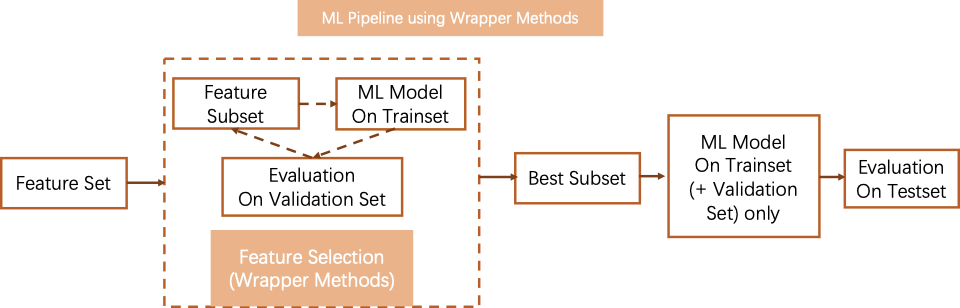

### Deterministic Algorithm

Deterministic Algorithm will always output the same subset of features given the same data input. Sequential Forward Selection (SFS), Sequential Backward Selection (SBS) are examples of the Deterministic Algorithm.  
  
SFS starts from a model fitting on one single feature, and every step, it adds one new feature into the existing model that output the best performance until the number of selected features meets requirement.  
  
Whereas, SBS starts from a model fitting on all features, and every step, it deletes the lease important feature from the subset that until the number of selected features meets requirement.  

But both SFS & SBS are likely to get stuck at local optimals.

#### Recursive Feature Elimination (SBS)

In sklearn, it implements Recursive Feature Elimination (SBS) only. Sklearn provides two Recursive Feature Elimination function, one is RFE and the another is RFECV. Compared with RFE function, REFCV function uses cross-validated results to select the best number of features, whereas in RFE, the number of features to select is predefined by users.

In [2]:
# RFE
from sklearn.feature_selection import RFE

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 samples as train_set
# the rest samples as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# define a predictive model
from sklearn.ensemble import ExtraTreesRegressor # we use extratree
clf = ExtraTreesRegressor(n_estimators=25)
selector = RFE(estimator = clf, n_features_to_select = 4, step = 1)
# selectt 4 features, each step we only remove one feature
selector = selector.fit(train_set, train_y)

transformed_train = train_set[:,selector.support_]  # select the 1st, 6th, 7th, 8th features
transformed_test = test_set[:,selector.support_] # select the 1st, 6th, 7th, 8th features

In [5]:
# RFECV
from sklearn.feature_selection import RFECV

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 samples as train_set
# the rest samples as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# define a predictive model
from sklearn.ensemble import ExtraTreesRegressor # we use extratree
clf = ExtraTreesRegressor(n_estimators=25)
selector = RFECV(estimator = clf, step = 1, cv = 5) # use 5-fold cross validation
# selectt 4 features, each step we only remove one feature
selector = selector.fit(train_set, train_y)

transformed_train = train_set[:,selector.support_]  # select all the features
transformed_test = test_set[:,selector.support_] # select all the features

### Randomized Algorithms

Compared with Deterministic Algorithm, the Randomized Algorithms employs a degree of randomness when searching the best subset. So it might output different subsets of features given the same data input but the randomness will help the model avoid stucking at the local optimal results. 

#### Simulated Annealing (SA)

Simulated annealing is a controlled random search method. Each time, we will select a feature subset completely at random based on the current solution. If the new subset works better, then we will adopt it. If the new subset works worse, we will still accept it but at some probability determined by the current state. 
  
Accepting worse solution is crucial in SA algorithm, because this helps to avoid stucking at local optiamals. As the iteration going, the SA algorithm should reach and converge to a good and stable solution.  
  
Since currently there aren't any packages implemented the SA algorithm well, so I wrote a python script to implement the SA algorithm for your reference.

Formula:  
  
The probability of accepting a worse solution is as below:  
$Prob = exp( - \frac{loss_{n} - loss_{o}}{k * Cur\_{Temperature}})$  

The SA algorithm:  

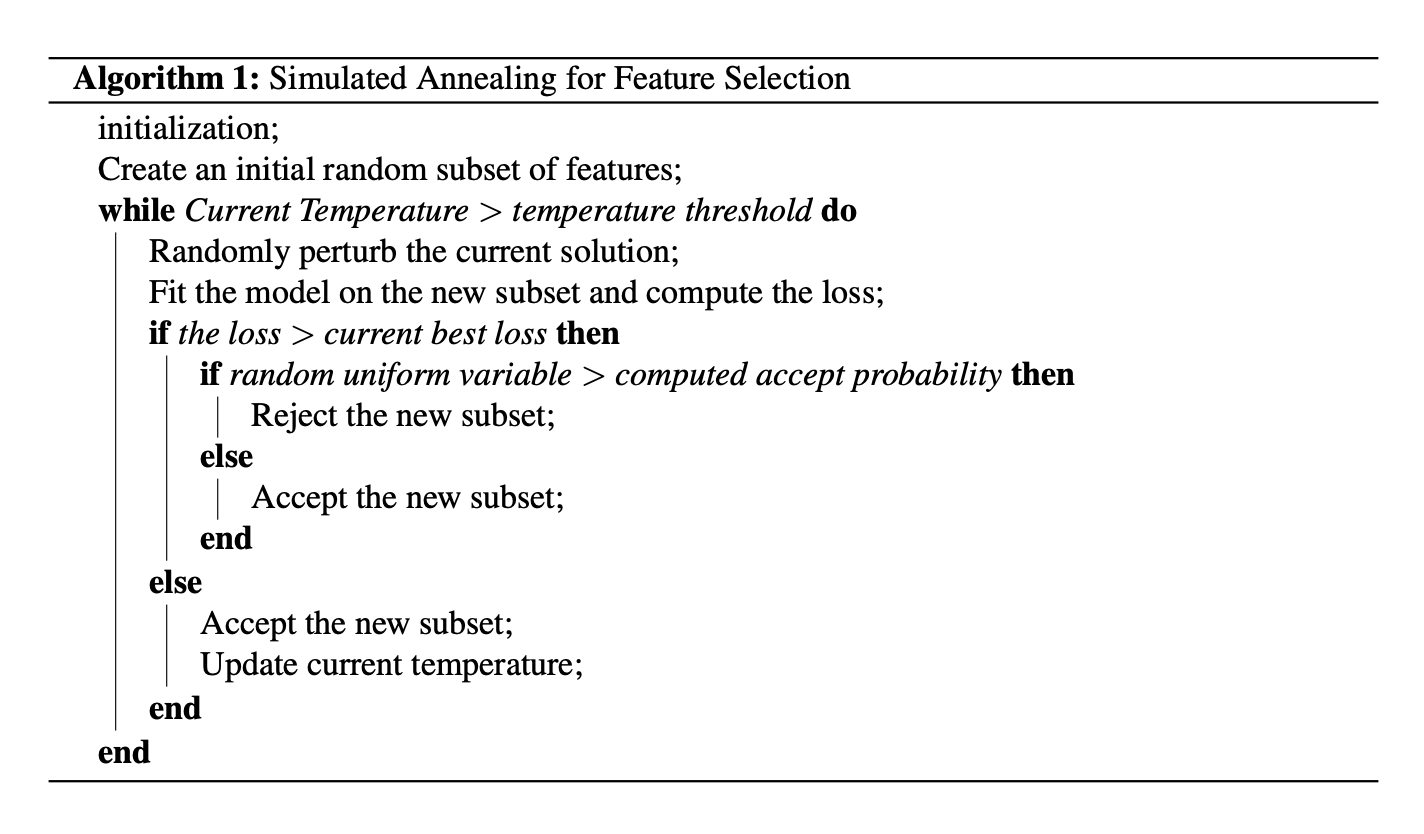


Regression example

In [6]:
from SA import Simulated_Annealing # import the python script with SA.

# regression example
# load the dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 samples as train_set
# the rest samples as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# define a predictive model
from sklearn.ensemble import ExtraTreesRegressor # we use extratree as predictive model

# define the loss function in SA algorithm
from sklearn.metrics import mean_squared_error # for regression task we use MSE

clf = ExtraTreesRegressor(n_estimators=25)
selector = Simulated_Annealing(loss_func = mean_squared_error, estimator = clf, 
                               init_temp = 0.2, min_temp = 0.005, iteration = 10, alpha = 0.9)
selector.fit(X_train = train_set, y_train = train_y, cv = 5) # use 5-fold cross-validation

transformed_train = selector.transform(train_set) # trainset after feature selection
transformed_test = selector.transform(test_set)  # testset after feature selection

In [7]:
selector.best_sol # return the best solution feature index;
selector.best_loss; # return the loss associated with the best solution; 

Classification example

In [13]:
import numpy as np
from SA import Simulated_Annealing # import the python script with SA.

# classification example
# use iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# random suffle the dataset
# use the first 100 samples as train_set
# the rest 5 samples as test_set
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]
test_y = y[100:,]

# define a predictive model
from sklearn.ensemble import ExtraTreesClassifier # we use extratree as predictive model

# define the loss function in SA algorithm
from sklearn.metrics import log_loss # for classification we use entropy

clf = ExtraTreesClassifier(n_estimators=25)
selector = Simulated_Annealing(loss_func = log_loss, estimator = clf, 
                               init_temp = 0.2, min_temp = 0.005, iteration = 10, 
                               alpha = 0.9, predict_type = 'predict_proba')
selector.fit(X_train = train_set, y_train = train_y, X_val = test_set, 
             y_val = test_y, stop_point = 10)

transformed_train = selector.transform(train_set)  # trainset after feature selection
transformed_test = selector.transform(test_set)  # testset after feature selection

In [14]:
selector.best_sol # return the best solution feature index;
selector.best_loss; # return the loss associated with the best solution; 

#### Genetic Algorithm (GA)

Genetic algorithms is a stochastic optimization tool based on concepts of evolution population biology. It mimics the evolutionary process in the nature and solve the optimization problem by allowing the solutions to reproduce and create new solutions (generations) by "crossover" and "mutaion". It also incorporates the competition concept and only allows the most fit solutions (in our cases, feature subsets that result in low loss) to survive and populate the their subsequent generation. After certain generation evolving, GA should converge to a optimization solution.
  
I also wrote a python script to implement the GA algorithm for your reference. It provides two algorithms including 'one-max' and 'NSGA2'. 'One-max' is the traditional one objective GA algorithm and 'NSGA2' is a multi-objective GA algorithm. In our case, the target of 'one-max' is to reduce the loss, while the target of 'NSGA2' is to minimize both the loss and also the number of features in the subset.

The GA algorithm:  
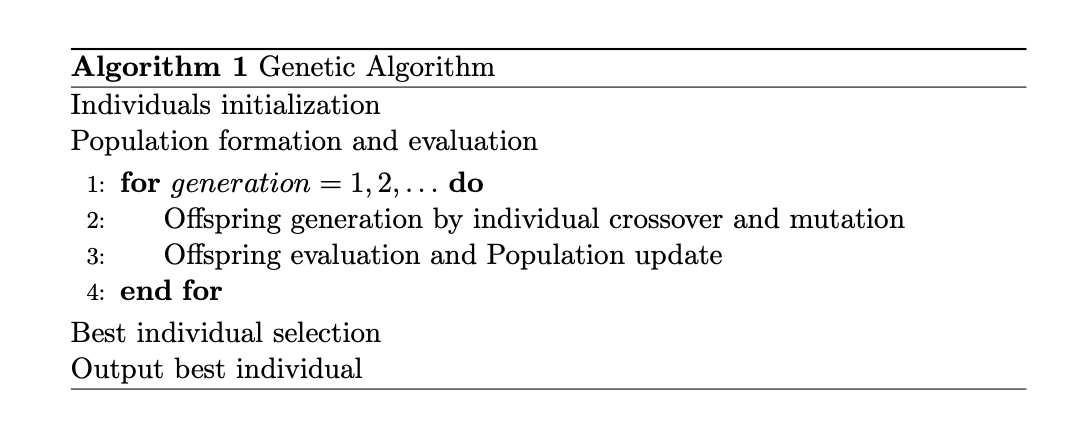

Regression example

In [7]:
from GA import Genetic_Algorithm # import the python script with GA.

# regression example
# load the dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 samples as train_set
# the rest samples as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# define a predictive model
from sklearn.ensemble import ExtraTreesRegressor # we use extratree as predictive model

# define the loss function in SA algorithm
from sklearn.metrics import mean_squared_error # for regression task we use MSE

clf = ExtraTreesRegressor(n_estimators=25)
selector = Genetic_Algorithm(loss_func = mean_squared_error, estimator = clf, 
                             n_gen = 10, n_pop = 20, algorithm = 'NSGA2')
# parameters detail can be viewed from GA.py

selector.fit(X_train = train_set, y_train = train_y, cv = 5) # use 5-fold cross-validation

transformed_train = selector.transform(train_set) # trainset after feature selection
transformed_test = selector.transform(test_set)  # testset after feature selection

100%|██████████| 10/10 [01:35<00:00,  9.59s/it]


In [8]:
selector.best_sol # return the best solution feature index;
selector.best_loss; # return the loss associated with the best solution; 

Classification example

In [22]:
import numpy as np
from GA import Genetic_Algorithm # import the python script with GA.

# classification example
# use iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# random suffle the dataset
# use the first 100 samples as train_set
# the rest 5 samples as test_set
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]
test_y = y[100:,]

# define a predictive model
from sklearn.ensemble import ExtraTreesClassifier # we use extratree as predictive model

# define the loss function in SA algorithm
from sklearn.metrics import log_loss # for classification we use entropy

clf = ExtraTreesClassifier(n_estimators=25)
selector = Genetic_Algorithm(loss_func = log_loss, estimator = clf, 
                             n_gen = 5, n_pop = 10, predict_type = 'predict_proba')
# parameters detail can be viewed from GA.py

selector.fit(X_train = train_set, y_train = train_y, X_val = test_set, 
             y_val = test_y) # use pre-defined validation set

transformed_train = selector.transform(train_set)  # trainset after feature selection
transformed_test = selector.transform(test_set)  # testset after feature selection

100%|██████████| 5/5 [00:00<00:00, 57.16it/s]


In [24]:
selector.best_sol # return the best solution feature index;
selector.best_loss; # return the loss associated with the best solution; 

## Embedded Methods

The selection process of Filter Methods is independent of the ML models, so Filter Methods might select features that is less importance in the ML models and might lead to poor model performance.  
  
Wrapper Methods utilize the predefined ML models to select the best features. But since they need to train models many times on large number of possible subsets, they requires long processing time although they usually leads to better performance than the Filter Methods.
  
Embedded Methods embeds the feature selection process inside the ML models. They learn the best feature subset while the model is being created. So compared with the Filter Methods, they tend to have better performace. Compared with the Wrapper Methods, they save large processing time and computing power.

**Comparision between three approaches**.  
   
|Aspects | Filter Methods | Wrapper Methods	| Embedded Method
|--|--|--|--|
|Reliance on Model| No | Yes | Yes |
|Require Cross Validation |	No | Yes | Maybe
|Process Time |	Short | Long | Medium
|Restriction on the ML models|	No | No | Yes (linear models with L1 or L2 norm or tree-based models)

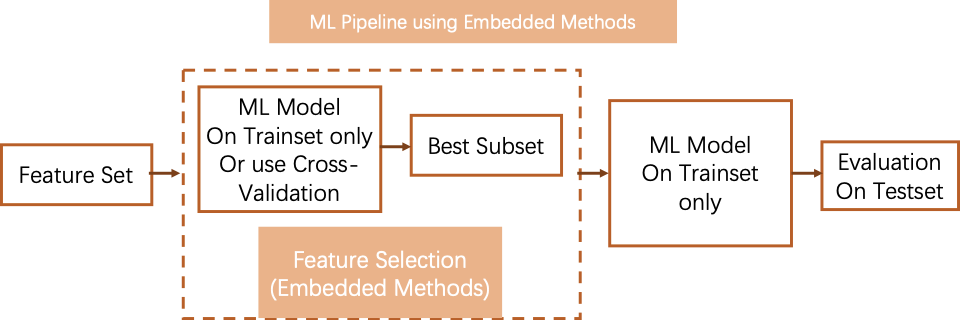

### Regulization Based Methods

Many ML models introduce penaies (L1 norm or L2 norm) in ther loss functions to prevent overfitting problem. The L1 norm penalization in linear models (such as Linear SVC, Logistic Regression, Linear Regression) tends to shrink the feature coefficients of some features to zero therefore results in sparse solutions. The L2 norm penalization can also shrink the feature coefficients but less likely to shrink coefficients to zero.  
  
So we can use sklearn SelectFromModel function to remove features that have low or zero feature coefficients.

#### Lasso Regression (Linear Regression with L1 Norm)

In [20]:
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso # we can also use Ridge regression with L2 norm 

# regression example
# load the dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 samples as train_set
# the rest samples as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

clf = Lasso(normalize=True, alpha = 0.001)  # we need to normalize the data first or 
# the coefficient is meanless and uncomparable
# if alpha is set too high, then the L1 norm will shrink every coefficients to 0
# the bigger alpha, the stronger the penalty

clf.fit(train_set, train_y)
clf.coef_ # should select the 1st, 2nd, 7th features

array([ 0.34585838,  0.00297621, -0.        , -0.        , -0.        ,
       -0.        , -0.03275035,  0.        ])

In [25]:
selector = SelectFromModel(clf, prefit=True, threshold=1e-5)
# we can also set the max_features parameters to select the top features
# threshold is set to 1e-5, so the features with absolut coefficients below 1e-5 
# will be removed

transformed_train = selector.transform(train_set)
transformed_test = selector.transform(test_set)
assert np.array_equal(transformed_train, train_set[:,[0,1,6]]) 
# select the 1st, 2nd, 7th features
assert np.array_equal(transformed_test, test_set[:,[0,1,6]]) 

#### Logistic Regression (with L1 Norm)

In [17]:
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris # use iris dataset as example

# use iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# random suffle the dataset
# use the first 100 samples as train_set
# the rest 5 samples as test_set
np.random.seed(1234)
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

# use the first 100 samples as train_set
# the rest 5 samples as test_set
train_set = X[0:100,:]
test_set = X[100:,]
train_y = y[0:100]

# we need to standard the data first or the coefficient is useless
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(train_set) 
standardized_train = model.transform(train_set)
standardized_test = model.transform(test_set)

clf = LogisticRegression(penalty='l1', C = 0.7, random_state=1234) 
# can set the penalty to 'l2'
# if C is set too low, then the L1 norm will shrink every coefficients to 0
# the bigger C, the weaker the penalty

clf.fit(standardized_train, train_y)
clf.coef_ # should select the 2nd, 3rd and 4th features

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[ 0.        ,  0.99983263, -3.45232928, -0.15907564],
       [ 0.        , -1.2010388 ,  0.052592  ,  0.        ],
       [ 0.        ,  0.        ,  1.33068597,  3.2700662 ]])

In [18]:
selector = SelectFromModel(clf, prefit=True, threshold=1e-5)
# we can also set the max_features parameters to select the top features
# threshold is set to 1e-5, so the features with absolut coefficients below 1e-5 
# will be removed

transformed_train = selector.transform(train_set)
transformed_test = selector.transform(test_set)
assert np.array_equal(transformed_train, train_set[:,[1,2,3]]) 
# select the 2nd, 3rd features
assert np.array_equal(transformed_test, test_set[:,[1,2,3]]) 

#### LinearSVR/ LinearSVC

In [52]:
# we can use LinearSVC for classification
# LinearSVR for regression

import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVR

# regression example
# load the dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 samples as train_set
# the rest samples as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# we need to normalize the data first or the coefficient is useless and uncomparable
from sklearn.preprocessing import Normalizer
model = Normalizer(norm='l1')
model.fit(train_set) 
normalized_train = model.transform(train_set)
normalized_test = model.transform(test_set)

clf = LinearSVR(C = 0.01) 
# the bigger C, the weaker the penalty

clf.fit(normalized_train, train_y)
clf.coef_ # should only remove the 4th features

array([ 0.13849297,  0.18816961,  0.04544048, -0.00159845,  0.55344663,
       -0.01682706,  0.02309885, -0.27884212])

In [53]:
selector = SelectFromModel(clf, prefit=True, threshold=1e-2)
# we can also set the max_features parameters to select the top features
# threshold is set to 1e-2, so the features with absolut coefficients below 1e-2
# will be removed

transformed_train = selector.transform(train_set)
transformed_test = selector.transform(test_set)
assert np.array_equal(transformed_train, train_set[:,[0,1,2,4,5,6,7]]) 
# only remove the 4th features
assert np.array_equal(transformed_test, test_set[:,[0,1,2,4,5,6,7]]) 

### Tree Based Methods

There are many powerful tree-based ML models such as random forest, adaboost, xgboost etc. You can check out more introduction about these tree-based ML models in a series of blogs written by my friend and I [here](https://github.com/YC-Coder-Chen/Tree-Math).  
  
These non-parametric models record how each features are used to reduce the loss by splitting the tree nodes and can report the feature importances of each features based on the above records. The feature importances can be used to discard irrelevant features. 

In [54]:
# we use the random forest regressor model as the example

import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# load the dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example

# use the first 15000 samples as train_set
# the rest samples as test_set
train_set = X[0:15000,:]
test_set = X[15000:,]
train_y = y[0:15000]

# we don't need to normaliz the dataset in tree-based feature selection

clf = RandomForestRegressor(n_estimators = 50)

clf.fit(train_set, train_y)
clf.feature_importances_ # should only remove the 4th features

array([0.51547644, 0.04629398, 0.0318485 , 0.02507641, 0.02700977,
       0.13939164, 0.10636765, 0.10853559])

Text(0.5, 0, 'Relative Importance')

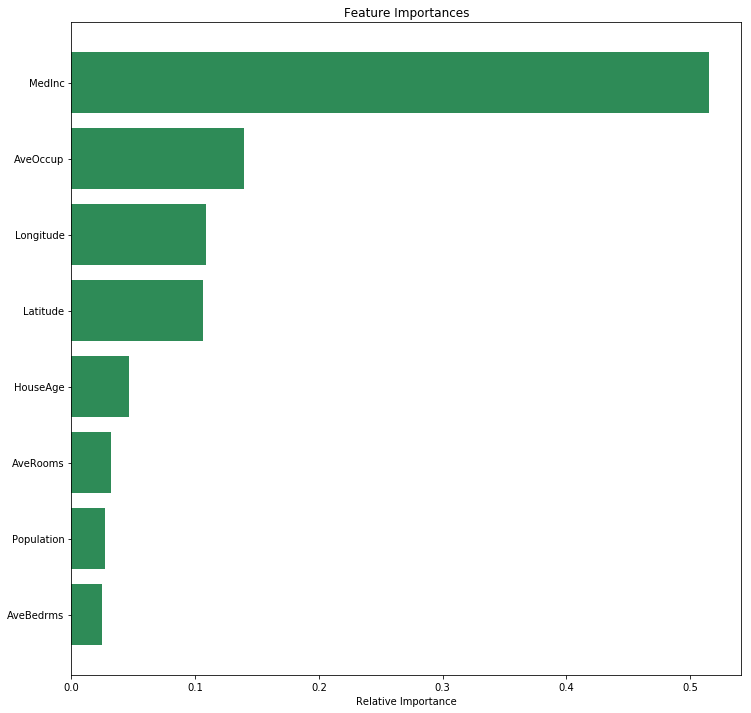

In [65]:
# plot the variable importance
import matplotlib.pyplot as plt
%matplotlib inline
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='seagreen', align='center')
plt.yticks(range(len(indices)),np.array(dataset.feature_names)[indices])
plt.xlabel('Relative Importance')

In [70]:
selector = SelectFromModel(clf, prefit=True, threshold='median')
# we can also set the max_features parameters to select the top features
# threshold is set to 'median', which is the median of the variable importances
# which is around 0.0763

transformed_train = selector.transform(train_set)
transformed_test = selector.transform(test_set)
assert np.array_equal(transformed_train, train_set[:,[0,5,6,7]]) 
# select the 1st, 6th, 7th and 8th features
assert np.array_equal(transformed_test, test_set[:,[0,5,6,7]]) 